In [ ]:
!pip install torch torchvision transformers
!pip install tqdm

STEP 1: Import libraries

In [ ]:
# step 1: Import libraries
import pandas as pd
from PIL import Image
import json
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import zipfile
from google.colab import drive
import random
import cv2
import re
from tqdm import tqdm

In [ ]:
# Define the data path
drive.mount('/content/drive')
data_path = '/content/drive/My Drive/Colab Notebooks/'


Mounted at /content/drive


STEP 2: LOAD TRAIN DATA

In [ ]:
# Define function for loading questions and annotations

def load_data(data_file, feature):

  # Check if the file exists
  if os.path.exists(data_file):
    print("File found:", data_file)

    # Load the JSON file using the json module
    with open(data_file, 'r') as f:
        data = json.load(f)

    # Convert the JSON data to a DataFrame
    # questions = pd.DataFrame(data)

    # Flatten the JSON structure
    data = pd.json_normalize(data[feature])

    # Question preprocessing

    print("Data loaded successfully")
  else:
    print("File not found:", data_file)

  return data

*Load and prepare the training dataset*

In [ ]:
# Load training questions

# Define the questions file
train_questions_file = os.path.join(data_path, 'train2015/MultipleChoice_abstract_v002_train2015_questions.json')
#train_questions_file = os.path.join(data_path)
train_questions_feature = 'questions'

train_questions = load_data(train_questions_file, train_questions_feature )

# Check the first 5 rows
train_questions

File found: /content/drive/My Drive/Colab Notebooks/train2015/MultipleChoice_abstract_v002_train2015_questions.json
Data loaded successfully


,image_id,question,multiple_choices,question_id
0,11779,Who looks happier?,"[alive, 1, woman, purple, 2, yes, white, boy, ...",117792
1,11779,Where is the woman sitting?,"[3, no, blue, red, 1, slide, monkey bars, jump...",117790
2,11779,Where is the man sitting?,"[away, yes, blue, 1, 2, mouse, couch, no, yell...",117791
3,5536,Is this man hungry?,"[water, yellow, 4, running, blue, pouring, out...",55360
4,5536,What kind of drink is that?,"[wine, girl would fall, soda, white, yes, coke...",55361
...,...,...,...,...
59995,11695,What color is the log the little girl sitting on?,"[tan, brown, white, 1, running, red, 4, pink, ...",116950
59996,11695,Does the boy want to go on the seesaw?,"[red, no table, fetch, kicking soccer ball, ye...",116951
59997,13790,What animal is between the two men?,"[dog, 4, yellow, 1, collectors, no, red, yes, ...",137900
59998,13790,What food is by the picnic basket?,"[4, she is happy, grapes, pizza, white, becaus...",137901


In [ ]:
# Load trainning annotations

# Define the annotations file
train_annotations_file = os.path.join(data_path, 'train2015/abstract_v002_train2015_annotations.json')
train_annotations_feature = 'annotations'
train_annotations = load_data(train_annotations_file, train_annotations_feature)

#print(train_annotations_file[annotations])
# Check the first 5 rows
train_annotations

File found: /content/drive/My Drive/Colab Notebooks/train2015/abstract_v002_train2015_annotations.json
Data loaded successfully


,question_type,multiple_choice_answer,answers,image_id,answer_type,question_id
0,who,man,"[{'answer': 'old person', 'answer_confidence':...",11779,other,117792
1,where is the,blanket,"[{'answer': 'on blanket', 'answer_confidence':...",11779,other,117790
2,where is the,bench,"[{'answer': 'on bench', 'answer_confidence': '...",11779,other,117791
3,is this,yes,"[{'answer': 'yes', 'answer_confidence': 'yes',...",5536,yes/no,55360
4,what kind of,soda,"[{'answer': 'water', 'answer_confidence': 'no'...",5536,other,55361
...,...,...,...,...,...,...
59995,what color is the,brown,"[{'answer': 'brown', 'answer_confidence': 'yes...",11695,other,116950
59996,does the,yes,"[{'answer': 'yes', 'answer_confidence': 'yes',...",11695,yes/no,116951
59997,what animal is,cat,"[{'answer': 'cat', 'answer_confidence': 'yes',...",13790,other,137900
59998,what,watermelon,"[{'answer': 'watermelon, sandwich, burger', 'a...",13790,other,137901


In [ ]:
# Load trainning captions

# Define the annotations file
train_captions_file = os.path.join(data_path, 'train2015/captions_abstract_v002_train2015.json')
train_captions_feature = 'images'
train_captions = load_data(train_captions_file, train_captions_feature)

#print(train_captions_file[annotations])
# Check the first 5 rows
train_captions

File found: /content/drive/My Drive/Colab Notebooks/train2015/captions_abstract_v002_train2015.json
Data loaded successfully


,url,file_name,image_id,width,height
0,http://visualqa.org/data/abstract_v002/scene_i...,abstract_v002_train2015_000000000000.png,0,700,400
1,http://visualqa.org/data/abstract_v002/scene_i...,abstract_v002_train2015_000000000001.png,1,700,400
2,http://visualqa.org/data/abstract_v002/scene_i...,abstract_v002_train2015_000000000002.png,2,700,400
3,http://visualqa.org/data/abstract_v002/scene_i...,abstract_v002_train2015_000000000003.png,3,700,400
4,http://visualqa.org/data/abstract_v002/scene_i...,abstract_v002_train2015_000000000004.png,4,700,400
...,...,...,...,...,...
19995,http://visualqa.org/data/abstract_v002/scene_i...,abstract_v002_train2015_000000019995.png,19995,700,400
19996,http://visualqa.org/data/abstract_v002/scene_i...,abstract_v002_train2015_000000019996.png,19996,700,400
19997,http://visualqa.org/data/abstract_v002/scene_i...,abstract_v002_train2015_000000019997.png,19997,700,400
19998,http://visualqa.org/data/abstract_v002/scene_i...,abstract_v002_train2015_000000019998.png,19998,700,400


In [ ]:
# Load trainning captions

# Define the annotations file
train_OpenEnded_file = os.path.join(data_path, 'train2015/OpenEnded_abstract_v002_train2015_questions.json')
train_OpenEnded_feature = 'questions'
train_OpenEnded = load_data(train_OpenEnded_file, train_OpenEnded_feature)

#print(train_captions_file[annotations])
# Check the first 5 rows
train_OpenEnded

File found: /content/drive/My Drive/Colab Notebooks/train2015/OpenEnded_abstract_v002_train2015_questions.json
Data loaded successfully


,question,image_id,question_id
0,Who looks happier?,11779,117792
1,Where is the woman sitting?,11779,117790
2,Where is the man sitting?,11779,117791
3,Is this man hungry?,5536,55360
4,What kind of drink is that?,5536,55361
...,...,...,...
59995,What color is the log the little girl sitting on?,11695,116950
59996,Does the boy want to go on the seesaw?,11695,116951
59997,What animal is between the two men?,13790,137900
59998,What food is by the picnic basket?,13790,137901


2.2 MERGE TRAIN DATA

In [ ]:
# Merge questions and answers

#train_data = pd.merge(train_questions, train_annotations, on='question_id')
train_data = pd.merge(train_questions, train_annotations, on=["image_id", "question_id"])

df_train = train_data.merge(train_captions, on='image_id')
df_train

,image_id,question,multiple_choices,question_id,question_type,multiple_choice_answer,answers,answer_type,url,file_name,width,height
0,11779,Who looks happier?,"[alive, 1, woman, purple, 2, yes, white, boy, ...",117792,who,man,"[{'answer': 'old person', 'answer_confidence':...",other,http://visualqa.org/data/abstract_v002/scene_i...,abstract_v002_train2015_000000011779.png,700,400
1,11779,Where is the woman sitting?,"[3, no, blue, red, 1, slide, monkey bars, jump...",117790,where is the,blanket,"[{'answer': 'on blanket', 'answer_confidence':...",other,http://visualqa.org/data/abstract_v002/scene_i...,abstract_v002_train2015_000000011779.png,700,400
2,11779,Where is the man sitting?,"[away, yes, blue, 1, 2, mouse, couch, no, yell...",117791,where is the,bench,"[{'answer': 'on bench', 'answer_confidence': '...",other,http://visualqa.org/data/abstract_v002/scene_i...,abstract_v002_train2015_000000011779.png,700,400
3,5536,Is this man hungry?,"[water, yellow, 4, running, blue, pouring, out...",55360,is this,yes,"[{'answer': 'yes', 'answer_confidence': 'yes',...",yes/no,http://visualqa.org/data/abstract_v002/scene_i...,abstract_v002_train2015_000000005536.png,700,400
4,5536,What kind of drink is that?,"[wine, girl would fall, soda, white, yes, coke...",55361,what kind of,soda,"[{'answer': 'water', 'answer_confidence': 'no'...",other,http://visualqa.org/data/abstract_v002/scene_i...,abstract_v002_train2015_000000005536.png,700,400
...,...,...,...,...,...,...,...,...,...,...,...,...
59995,11695,What color is the log the little girl sitting on?,"[tan, brown, white, 1, running, red, 4, pink, ...",116950,what color is the,brown,"[{'answer': 'brown', 'answer_confidence': 'yes...",other,http://visualqa.org/data/abstract_v002/scene_i...,abstract_v002_train2015_000000011695.png,700,400
59996,11695,Does the boy want to go on the seesaw?,"[red, no table, fetch, kicking soccer ball, ye...",116951,does the,yes,"[{'answer': 'yes', 'answer_confidence': 'yes',...",yes/no,http://visualqa.org/data/abstract_v002/scene_i...,abstract_v002_train2015_000000011695.png,700,400
59997,13790,What animal is between the two men?,"[dog, 4, yellow, 1, collectors, no, red, yes, ...",137900,what animal is,cat,"[{'answer': 'cat', 'answer_confidence': 'yes',...",other,http://visualqa.org/data/abstract_v002/scene_i...,abstract_v002_train2015_000000013790.png,700,400
59998,13790,What food is by the picnic basket?,"[4, she is happy, grapes, pizza, white, becaus...",137901,what,watermelon,"[{'answer': 'watermelon, sandwich, burger', 'a...",other,http://visualqa.org/data/abstract_v002/scene_i...,abstract_v002_train2015_000000013790.png,700,400


2.3 LOAD Image

In [ ]:
mscoco_path = data_path+"/train2015/train2015_images"
#data_path, 'train2015/MultipleChoice_abstract_v002_train2015_questions.json'
images_file = os.path.join(mscoco_path)

# Define the path to your zip file and the extraction destination
extract_dir = os.path.join(data_path, 'train2015/train2015_images/')

image_path = list(df_train['file_name'])
question = list(df_train['question'])
answer = list(df_train['multiple_choice_answer'])

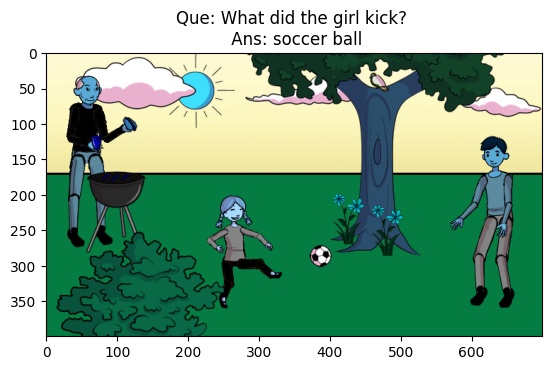

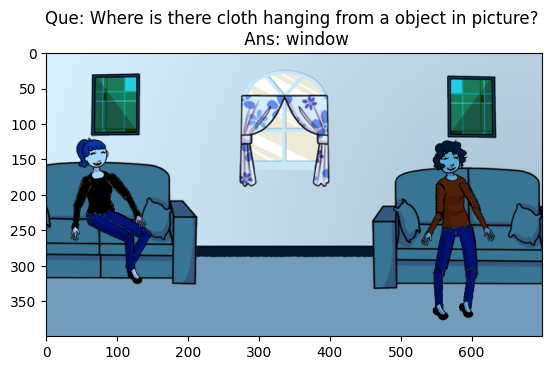

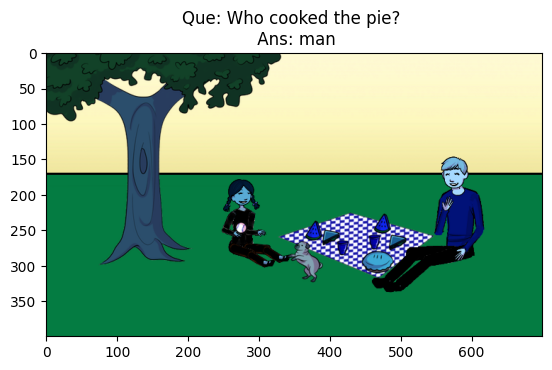

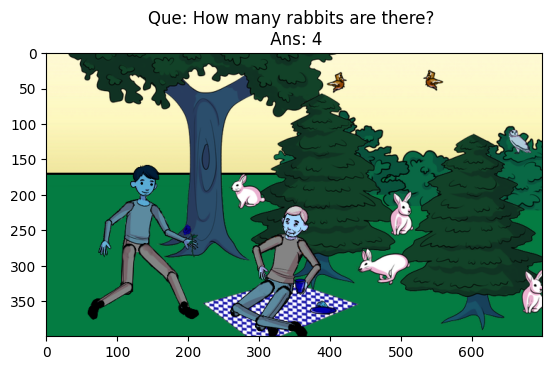

In [ ]:
# Plot sample images, questions and answers
temp = random.sample(range(0, 1000), 4)
for a,i in enumerate(temp):
    image = cv2.imread(data_path+"/train2015/train2015_images/" +image_path[i])

    plt.figure()
    plt.title(f'Que: {question[i]} \n Ans: {answer[i]}')
    plt.imshow(image)

In [ ]:
# # Extract images from .zip

# """
# # Define the images file
# images_file = os.path.join(data_path, 'abstract_v002_train2015_000000000000.png')
# image = Image.open(images_file)
# image.show()
# """

# # Define the images zip file
# images_file = os.path.join(data_path, 'train2015/scene_img_abstract_v002_train2015.zip')

# # Define the path to your zip file and the extraction destination
# extract_dir = os.path.join(data_path, 'train2015/train2015_images/')

# # Unzip the file
# with zipfile.ZipFile(images_file, 'r') as zip_ref:
#     zip_ref.extractall(extract_dir)

# print(f"Extracted all images to {extract_dir}")


# # Load images and preprocess in batches

# import torchvision.transforms as transforms

# # Get a list of all image files
# image_files = [f for f in os.listdir(extract_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]

# batch_size = 100  # Define your batch size
# num_batches = len(image_files) // batch_size

# # for batch_idx in range(num_batches + 1):
# for batch_idx in range(2):
#     start_idx = batch_idx * batch_size
#     end_idx = start_idx + batch_size
#     batch_files = image_files[start_idx:end_idx]

#     # Process each image in the batch
#     for image_file in batch_files:
#         image_path = os.path.join(extract_dir, image_file)
#         image = Image.open(image_path)

#         # print("Image size:", image.size)

#         # Define the transformation
#         transform = transforms.Compose([
#             transforms.Resize((224, 224)),  # Resizing to match model input size
#             transforms.ToTensor(),          # Convert to tensor
#             transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalization
#         ])

#         # Ensure the image is in RGB mode (3 channels)
#         if image.mode != 'RGB':
#             image = image.convert('RGB')

#         # Apply transformation to image
#         image_tensor = transform(image).unsqueeze(0)

#         # print("Tensor shape after transform:", image_tensor.shape)

#         # Close image after processing
#         image.close()

#     print(f"Processed batch {batch_idx + 1}/{num_batches + 1}")


**STEP 3 : EDA**

From the above examples, we can see that most of the questions and answers are simple and clean text but some questions contain punctuation, common word contractions like what’s, it’s, they’re, etc, and noun contractions like guy’s, man’s, dog’s, etc., and some answers also contain punctuation. Hence, we need to perform the data cleaning operation on the question and answer dataset and expand contractions before performing EDA.

In [ ]:

def decontractions(phrase):
    """decontracted takes text and convert contractions into natural form.
     ref: https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python/47091490#47091490"""
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"won\’t", "will not", phrase)
    phrase = re.sub(r"can\’t", "can not", phrase)

    phrase = re.sub(r"he\'s", "he is", phrase)
    phrase = re.sub(r"she\'s", "she is", phrase)
    phrase = re.sub(r"it\'s", "it is", phrase)

    phrase = re.sub(r"he\’s", "he is", phrase)
    phrase = re.sub(r"she\’s", "she is", phrase)
    phrase = re.sub(r"it\’s", "it is", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)

    phrase = re.sub(r"n\’t", " not", phrase)
    phrase = re.sub(r"\’re", " are", phrase)
    phrase = re.sub(r"\’d", " would", phrase)
    phrase = re.sub(r"\’ll", " will", phrase)
    phrase = re.sub(r"\’t", " not", phrase)
    phrase = re.sub(r"\’ve", " have", phrase)
    phrase = re.sub(r"\’m", " am", phrase)

    return phrase


def text_preprocess(text):
    text = text.lower()
    text = decontractions(text) # replace contractions into natural form
    text = re.sub('[-,:]', ' ', text) # replace the character "-" "," with space
    text = re.sub("(?!<=\d)(\.)(?!\d)", '', text) # remove the character ".", except from floating numbers
    text = re.sub('[^A-Za-z0-9. ]+', '', text) # remove all punctuation, except A-Za-z0-9
    text = re.sub(' +', ' ', text) # remove extra space
    return text

# Question and Answer text preprocessing
df_train["question_preprocessed"] = df_train["question"].map(lambda x: text_preprocess(x))
df_train["answer_preprocessed"] = df_train["multiple_choice_answer"].map(lambda x: text_preprocess(x))

In [ ]:
df_train

,image_id,question,multiple_choices,question_id,question_type,multiple_choice_answer,answers,answer_type,url,file_name,width,height,question_preprocessed,answer_preprocessed
0,11779,Who looks happier?,"[alive, 1, woman, purple, 2, yes, white, boy, ...",117792,who,man,"[{'answer': 'old person', 'answer_confidence':...",other,http://visualqa.org/data/abstract_v002/scene_i...,abstract_v002_train2015_000000011779.png,700,400,who looks happier,man
1,11779,Where is the woman sitting?,"[3, no, blue, red, 1, slide, monkey bars, jump...",117790,where is the,blanket,"[{'answer': 'on blanket', 'answer_confidence':...",other,http://visualqa.org/data/abstract_v002/scene_i...,abstract_v002_train2015_000000011779.png,700,400,where is the woman sitting,blanket
2,11779,Where is the man sitting?,"[away, yes, blue, 1, 2, mouse, couch, no, yell...",117791,where is the,bench,"[{'answer': 'on bench', 'answer_confidence': '...",other,http://visualqa.org/data/abstract_v002/scene_i...,abstract_v002_train2015_000000011779.png,700,400,where is the man sitting,bench
3,5536,Is this man hungry?,"[water, yellow, 4, running, blue, pouring, out...",55360,is this,yes,"[{'answer': 'yes', 'answer_confidence': 'yes',...",yes/no,http://visualqa.org/data/abstract_v002/scene_i...,abstract_v002_train2015_000000005536.png,700,400,is this man hungry,yes
4,5536,What kind of drink is that?,"[wine, girl would fall, soda, white, yes, coke...",55361,what kind of,soda,"[{'answer': 'water', 'answer_confidence': 'no'...",other,http://visualqa.org/data/abstract_v002/scene_i...,abstract_v002_train2015_000000005536.png,700,400,what kind of drink is that,soda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,11695,What color is the log the little girl sitting on?,"[tan, brown, white, 1, running, red, 4, pink, ...",116950,what color is the,brown,"[{'answer': 'brown', 'answer_confidence': 'yes...",other,http://visualqa.org/data/abstract_v002/scene_i...,abstract_v002_train2015_000000011695.png,700,400,what color is the log the little girl sitting on,brown
59996,11695,Does the boy want to go on the seesaw?,"[red, no table, fetch, kicking soccer ball, ye...",116951,does the,yes,"[{'answer': 'yes', 'answer_confidence': 'yes',...",yes/no,http://visualqa.org/data/abstract_v002/scene_i...,abstract_v002_train2015_000000011695.png,700,400,does the boy want to go on the seesaw,yes
59997,13790,What animal is between the two men?,"[dog, 4, yellow, 1, collectors, no, red, yes, ...",137900,what animal is,cat,"[{'answer': 'cat', 'answer_confidence': 'yes',...",other,http://visualqa.org/data/abstract_v002/scene_i...,abstract_v002_train2015_000000013790.png,700,400,what animal is between the two men,cat
59998,13790,What food is by the picnic basket?,"[4, she is happy, grapes, pizza, white, becaus...",137901,what,watermelon,"[{'answer': 'watermelon, sandwich, burger', 'a...",other,http://visualqa.org/data/abstract_v002/scene_i...,abstract_v002_train2015_000000013790.png,700,400,what food is by the picnic basket,watermelon


(60000, 14)

3.2 EDA - IMAGE

In [ ]:
print(df_train["height"].unique())
print(df_train["width"].unique())



[400]
[700]


In [ ]:
# Plot sample images, questions and answers
image_shape = []
temp = random.sample(range(0, 60000), 60000)
for a,i in enumerate(temp):
    image = cv2.imread(data_path+"/train2015/train2015_images/" +image_path[i])
    image_shape.append(image.shape)

AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
image_shape

[(400, 700, 3), (400, 700, 3), (400, 700, 3), (400, 700, 3), (400, 700, 3)]

In [ ]:
height = list((list(zip(*image_shape)))[0])
width = list((list(zip(*image_shape)))[1])
channel = list((list(zip(*image_shape)))[2])

3.2 EDA - Question

Number of questions: 60000
Number of answers: 60000


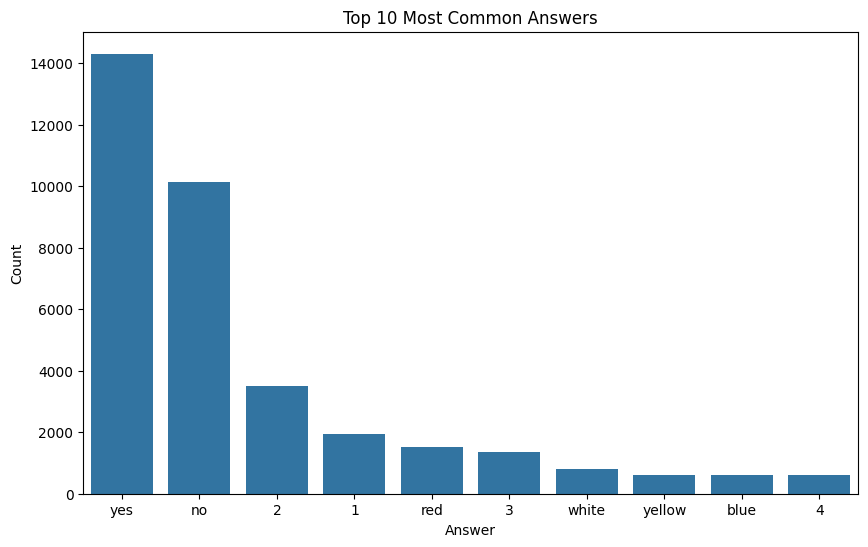

In [ ]:
# Perform EDA
print("Number of questions:", len(df_train["question_id"]))
print("Number of answers:", len(df_train["multiple_choice_answer"]))

answer_counts = df_train['multiple_choice_answer'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=answer_counts.index[:10], y=answer_counts.values[:10])
plt.title('Top 10 Most Common Answers')
plt.xlabel('Answer')
plt.ylabel('Count')
plt.show()


In [ ]:
# Create list of Character count, Word count, First one word, First two words, and unique words of questions
char_count_que = []
word_count_que = []
first_word_que = []
two_word_que = []
unique_word_que = []

for q in df_train["question_preprocessed"]:
    char_count_que.append(len(q))
    word_count_que.append(len(q.split()))
    first_word_que.append(q.split()[0].lower())
    two_word_que.append(" ".join(q.split()[:2]).lower())
    unique_word_que.extend(q.split())
unique_word_que = set(unique_word_que)

<ipython-input-119-8473a5f7c10e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(char_count_que, color='red')
<ipython-input-119-8473a5f7c10e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word_count_que, color='red')


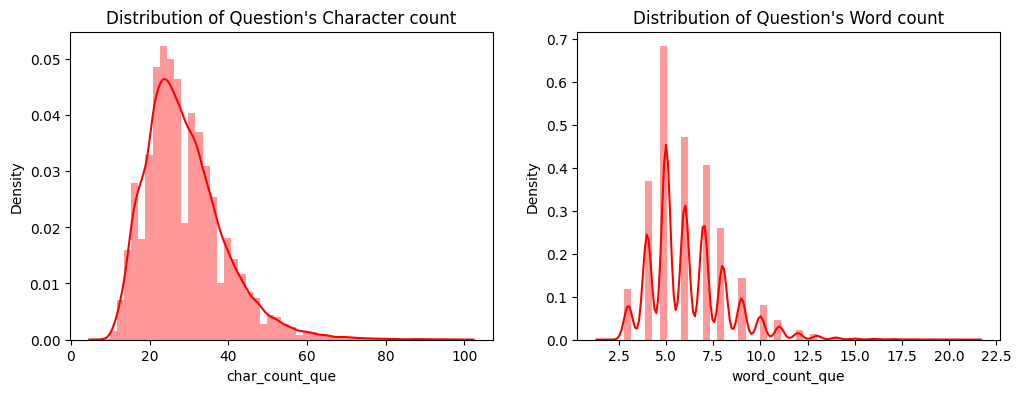

In [ ]:
# Plot Distribution of Character count, Word count of question
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(char_count_que, color='red')
plt.title('Distribution of Question\'s Character count')
plt.xlabel('char_count_que')
plt.subplot(1,2,2)
sns.distplot(word_count_que, color='red')
plt.title('Distribution of Question\'s Word count')
plt.xlabel('word_count_que')
plt.show()

In [ ]:
# Percentile of word_count_que
for i in range(0,101,10):
    print(f"{i}th percentile {np.percentile(word_count_que,i)}")
print("-"*25)
for i in range(91,101,1):
    print(f"{i}th percentile {np.percentile(word_count_que,i)}")

0th percentile 2.0
10th percentile 4.0
20th percentile 5.0
30th percentile 5.0
40th percentile 5.0
50th percentile 6.0
60th percentile 6.0
70th percentile 7.0
80th percentile 8.0
90th percentile 9.0
100th percentile 21.0
-------------------------
91th percentile 9.0
92th percentile 9.0
93th percentile 9.0
94th percentile 10.0
95th percentile 10.0
96th percentile 10.0
97th percentile 11.0
98th percentile 11.0
99th percentile 13.0
100th percentile 21.0


In [ ]:
print("The maximum character length of Question:", max(char_count_que))
print("The minimum character length of Question:", min(char_count_que))
print('The average character length of Question:',int(sum(char_count_que)/len(char_count_que)))
print('-'*50)
print("The maximum word length of Question:", max(word_count_que))
print("The minimum word length of Question:", min(word_count_que))
print('The average word length of Question:',int(sum(word_count_que)/len(word_count_que)))
print('-'*50)
print('Total unique words in questions:',len(unique_word_que))

The maximum character length of Question: 99
The minimum character length of Question: 8
The average character length of Question: 28
--------------------------------------------------
The maximum word length of Question: 21
The minimum word length of Question: 2
The average word length of Question: 6
--------------------------------------------------
Total unique words in questions: 4511


In [ ]:
print('Types of questions as per given question_type:',len(set(df_train["question_type"])))
print('Types of questions as per first one word of question:',len(set(first_word_que)))
print('Types of questions as per first two word of question:',len(set(two_word_que)))

# Create dataframe of First one word of question and its question count
count = {}
for i in first_word_que:
    count[i] = count.get(i, 0) + 1

first_word_que_df = pd.DataFrame(list(count.items()),columns=["first_word","question_count"])
first_word_que_df["question_%"] = first_word_que_df["question_count"]/len(first_word_que)*100
first_word_que_df = first_word_que_df.sort_values(by='question_count',ascending=False)
first_word_que_df.head(5)

Types of questions as per given question_type: 81
Types of questions as per first one word of question: 80
Types of questions as per first two word of question: 1068


,first_word,question_count,question_%
3,what,19909,33.181667
2,is,16276,27.126667
4,how,9026,15.043333
7,are,4480,7.466667
1,where,3139,5.231667


In [ ]:
# Create dataframe of First two words of question and its question count
count = {}
for i in two_word_que:
    count[i] = count.get(i, 0) + 1

two_word_que_df = pd.DataFrame(list(count.items()),columns=["two_word","question_count"])
two_word_que_df["question_%"] = two_word_que_df["question_count"]/len(first_word_que)*100
two_word_que_df = two_word_que_df.sort_values(by='question_count',ascending=False)
two_word_que_df.head(10)

,two_word,question_count,question_%
11,is the,11010,18.350000
8,what is,9761,16.268333
15,how many,8493,14.155000
4,what color,5356,8.926667
1,where is,2687,4.478333
16,is there,2113,3.521667
23,are the,1998,3.330000
21,does the,1406,2.343333
24,what are,992,1.653333
30,are there,934,1.556667


3.3 EDA - Answers

In [ ]:
# Create list of Character count, Word count, and unique words of answers
char_count_ans = []
word_count_ans = []
for a in (df_train["answer_preprocessed"]):
    char_count_ans.append(len(a))
    word_count_ans.append(len(a.split()))

unique_ans = set(df_train["answer_preprocessed"])

<ipython-input-132-346a13c6e4c9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(char_count_ans, color='red')
<ipython-input-132-346a13c6e4c9>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word_count_ans, color='red')


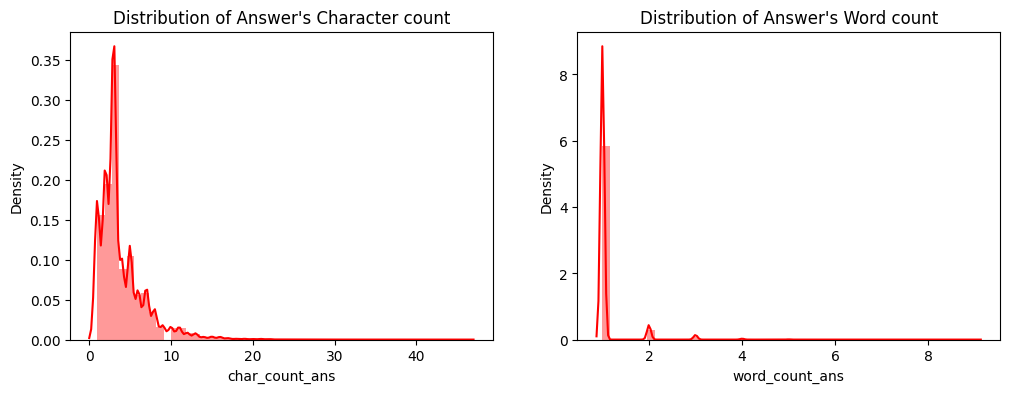

In [ ]:
# Plot Distribution of Character count, Word count of answers
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(char_count_ans, color='red')
plt.title('Distribution of Answer\'s Character count')
plt.xlabel('char_count_ans')
plt.subplot(1,2,2)
sns.distplot(word_count_ans, color='red')
plt.title('Distribution of Answer\'s Word count')
plt.xlabel('word_count_ans')
plt.show()

In [ ]:
# Percentile of word_count_ans
for i in range(0,101,10):
    print(f"{i}th percentile {np.percentile(word_count_ans,i)}")
print("-"*25)
for i in range(91,101,1):
    print(f"{i}th percentile {np.percentile(word_count_ans,i)}")

0th percentile 1.0
10th percentile 1.0
20th percentile 1.0
30th percentile 1.0
40th percentile 1.0
50th percentile 1.0
60th percentile 1.0
70th percentile 1.0
80th percentile 1.0
90th percentile 1.0
100th percentile 9.0
-------------------------
91th percentile 1.0
92th percentile 1.0
93th percentile 1.0
94th percentile 2.0
95th percentile 2.0
96th percentile 2.0
97th percentile 2.0
98th percentile 2.0
99th percentile 3.0
100th percentile 9.0


In [ ]:
print("The maximum character length of Answer:", max(char_count_ans))
print("The minimum character length of Answer:", min(char_count_ans))
print('The average character length of Answer:',int(sum(char_count_ans)/len(char_count_ans)))
print('-'*50)
print("The maximum word length of Answer:", max(word_count_ans))
print("The minimum word length of Answer:", min(word_count_ans))
print('The average word length of Answer:',int(sum(word_count_ans)/len(word_count_ans)))
print('-'*50)
print('Total number of unique Answers:',len(unique_ans))
print('Types of Answers as per given answer_type:',len(set(df_train["answer_type"])))

The maximum character length of Answer: 46
The minimum character length of Answer: 1
The average character length of Answer: 3
--------------------------------------------------
The maximum word length of Answer: 9
The minimum word length of Answer: 1
The average word length of Answer: 1
--------------------------------------------------
Total number of unique Answers: 2508
Types of Answers as per given answer_type: 3


In [ ]:
# create dataframe of answer_type and its counts
answer_type_df = (df_train.groupby(['answer_type']).count()['answers']).to_frame()
answer_type_df['answer%'] = round(answer_type_df['answers'] / len(df_train["answer_type"]) * 100,2)
answer_type_df = answer_type_df.sort_values(by='answers',ascending=False)
answer_type_df

,answers,answer%
answer_type,,
other,26916,44.86
yes/no,24396,40.66
number,8688,14.48


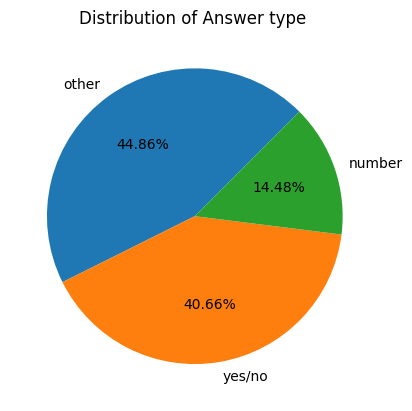

In [ ]:
# plot pie chart of dataframe of answer_type and its counts
plt.pie(list(answer_type_df['answer%']), labels=list(answer_type_df.index), autopct='%1.2f%%', startangle=45)
plt.title('Distribution of Answer type ')
plt.show()

In [ ]:
# create dataframe of unique answers and its counts in decending order of answer_count
count = {}
for i in df_train["answer_preprocessed"]:
    count[i] = count.get(i, 0) + 1

answer_df = pd.DataFrame(list(count.items()),columns=["answer","answer_count"])
answer_df["answer%"] = answer_df["answer_count"]/len(df_train["answer_preprocessed"])*100
answer_df = answer_df.sort_values(by='answer_count',ascending=False)
answer_df.head(10)

,answer,answer_count,answer%
3,yes,14314,23.856667
7,no,10143,16.905000
15,2,3496,5.826667
16,1,1934,3.223333
32,red,1506,2.510000
20,3,1373,2.288333
107,white,789,1.315000
33,yellow,603,1.005000
34,blue,603,1.005000
70,4,599,0.998333


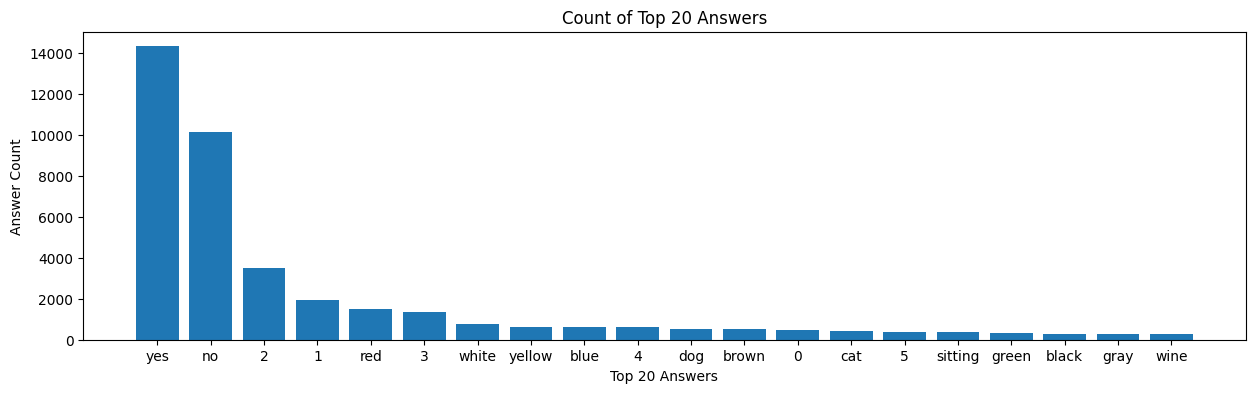

In [ ]:
# Plot top 20 answers and its count from above dataframe
plt.figure(figsize=(15,4))
plt.bar(list(answer_df['answer'])[:20], list(answer_df['answer_count'])[:20])
plt.title('Count of Top 20 Answers')
plt.xlabel('Top 20 Answers')
plt.ylabel('Answer Count')
plt.xticks(list(answer_df['answer'])[:20])
plt.show()

In [ ]:
print(f"Top 1000 answers coverd {round(sum(list(answer_df['answer%'][:1000])),2)}% of datapoints")
print(f"Top 2000 answers coverd {round(sum(list(answer_df['answer%'][:2000])),2)}% of datapoints")
print(f"Top 3000 answers coverd {round(sum(list(answer_df['answer%'][:3000])),2)}% of datapoints")

Top 1000 answers coverd 97.46% of datapoints
Top 2000 answers coverd 99.15% of datapoints
Top 3000 answers coverd 100.0% of datapoints


In [ ]:
# Answer preprocessing

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_answers = label_encoder.fit_transform(train_annotations['multiple_choice_answer'])


In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import Input, LSTM, Embedding, Dense
from keras.models import Model, Sequentia

ImportError: cannot import name 'Sequentia' from 'keras.models' (/usr/local/lib/python3.10/dist-packages/keras/api/models/__init__.py)

In [ ]:
# Load validation questions

# Define the questions file
val_questions_file = os.path.join(data_path, 'val2015/MultipleChoice_abstract_v002_val2015_questions.json')
val_questions_feature = 'questions'

val_questions = load_data(val_questions_file, val_questions_feature )

# Check the first 5 rows
val_questions.head(5)

File not found: /content/drive/My Drive/Colab Notebooks/val2015/MultipleChoice_abstract_v002_val2015_questions.json


UnboundLocalError: local variable 'data' referenced before assignment

In [ ]:
# Load validation annotations

# Define the annotations file
val_annotations_file = os.path.join(data_path, 'val2015/abstract_v002_val2015_annotations.json')
val_annotations_feature = 'annotations'
val_annotations = load_data(val_annotations_file, val_annotations_feature)

# Check the first 5 rows
val_annotations.head(5)

File not found: /content/drive/My Drive/Colab Notebooks/val2015/abstract_v002_val2015_annotations.json


UnboundLocalError: local variable 'data' referenced before assignment

In [ ]:
# Define VQA Model architecture

import tensorflow as tf
from tensorflow import keras
from keras.src.models.model import Model
from keras.src.layers.rnn.lstm import LSTM
from keras.src.layers.reshaping.flatten import Flatten
from keras.src.layers.pooling.max_pooling2d import MaxPooling2D
from keras.src.layers.merging.concatenate import Concatenate
from keras.src.layers.core.input_layer import Input
from keras.src.layers.core.embedding import Embedding
from keras.src.layers.core.dense import Dense
from keras.src.layers.convolutional.conv2d import Conv2D

# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten Embedding, LSTM, Dense, Concatenate

# Image model
image_input = Input(shape=(224, 224, 3))
x = Conv2D(32, (3, 3), activation='relu')(image_input)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
image_model = Model(inputs=image_input, outputs=x)

# Question model
question_input = Input(shape=(None,))
y = Embedding(input_dim=10000, output_dim=256)(question_input)
y = LSTM(256)(y)
question_model = Model(inputs=question_input, outputs=y)

# Combine models
combined = Concatenate()([image_model.output, question_model.output])
z = Dense(256, activation='relu')(combined)
z = Dense(1000, activation='softmax')(z)

vqa_model = Model(inputs=[image_model.input, question_model.input], outputs=z)
vqa_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the Model

# image_data, question_data, and labels

vqa_model.fit([image_data, question_data], labels, epochs=10, batch_size=32, validation_data=([val_image_data, val_question_data], val_labels))



In [ ]:
# Evaluate the Model
loss, accuracy = vqa_model.evaluate([val_image_data, val_question_data], val_labels)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')
